In [ ]:
"""CLUSTERING ANALYSIS """

In [ ]:
### Data Preprocessing

Missing values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


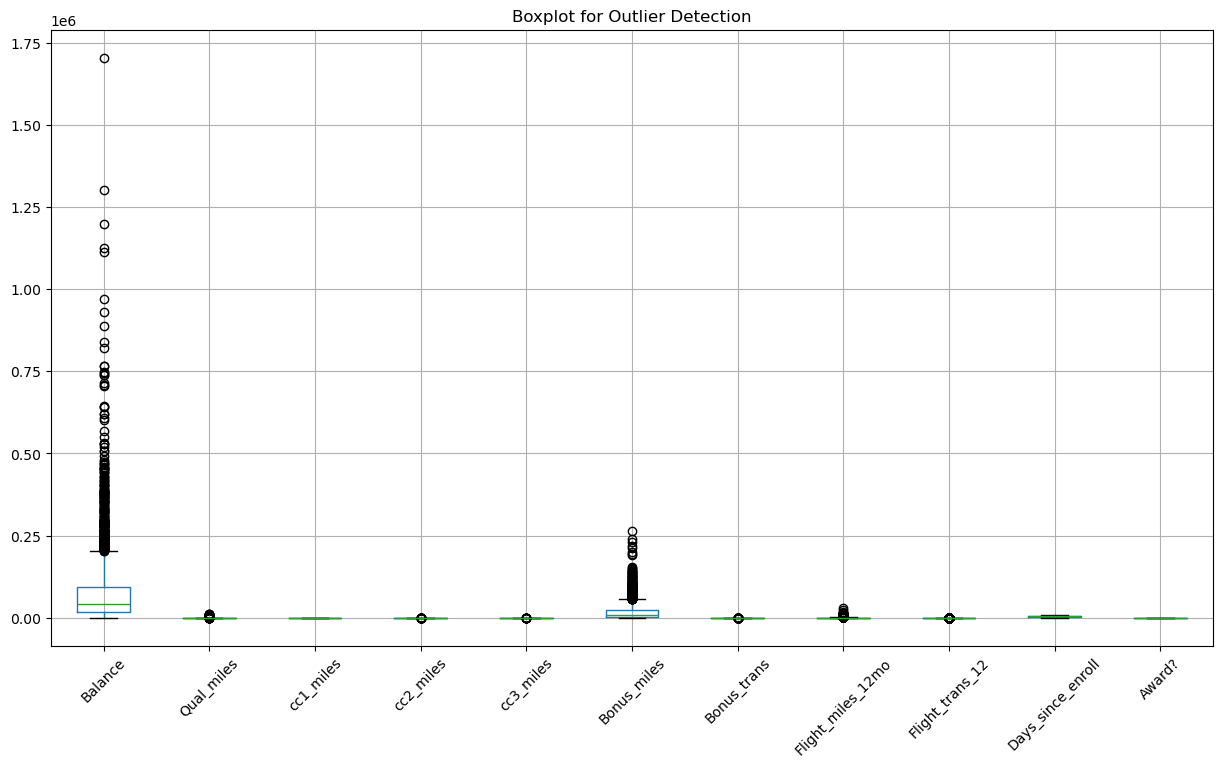

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('EastWestAirlines.csv')

# Drop ID column (irrelevant for clustering)
df.drop('ID#', axis=1, inplace=True)

# Check for missing values
print("Missing values", df.isnull().sum())

# Detect outliers via boxplot
plt.figure(figsize=(15,8))
df.boxplot(rot=45)
plt.title('Boxplot for Outlier Detection')
plt.show()

# Scaling features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()


In [97]:
""" Summary
No missing values were found.

Outliers are present, but scaling was applied using StandardScaler to normalize the data (mean=0, std=1).

Dropped the ID# column."""

' Summary\nNo missing values were found.\n\nOutliers are present, but scaling was applied using StandardScaler to normalize the data (mean=0, std=1).\n\nDropped the ID# column.'

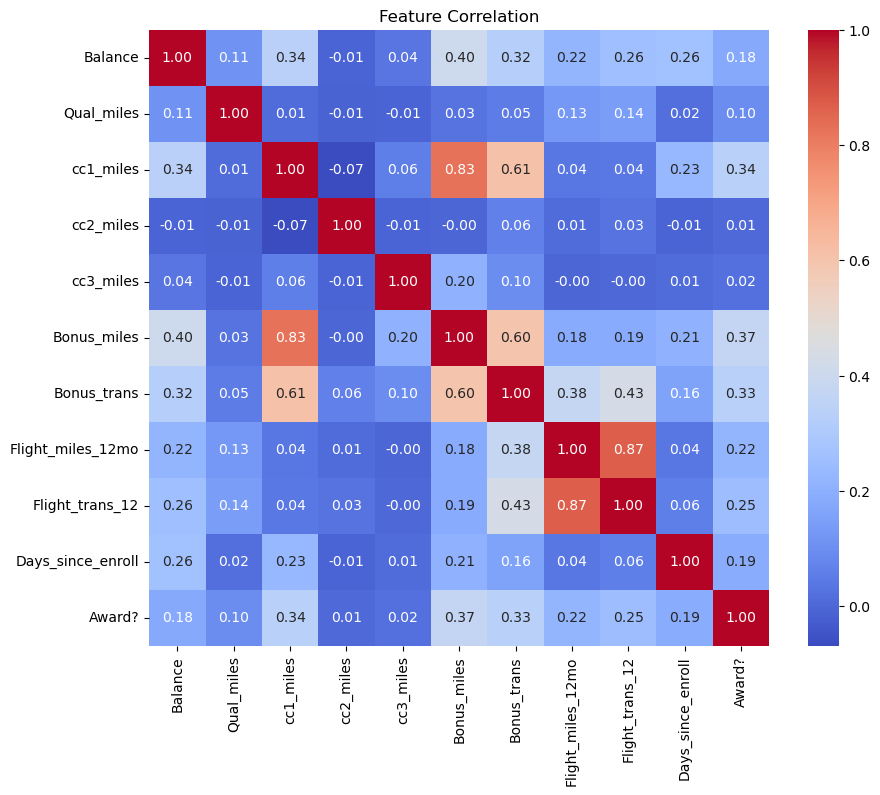

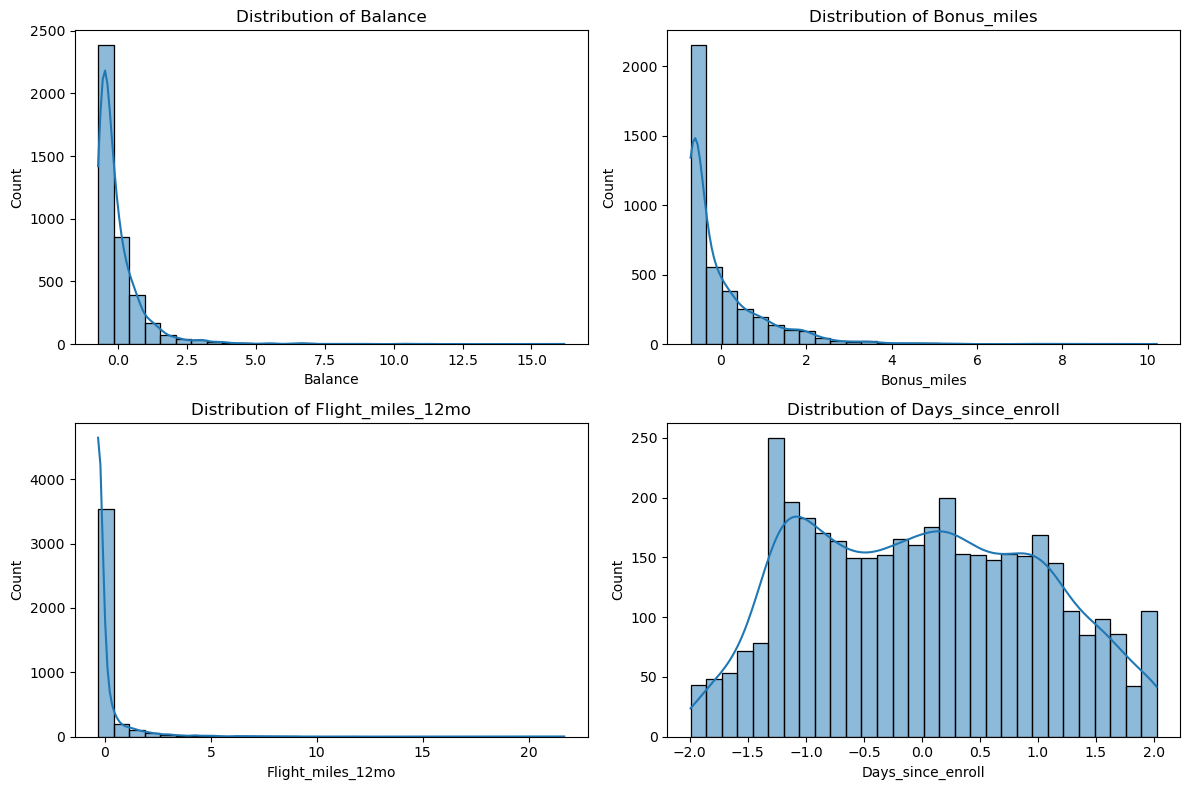

In [98]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

# Distribution plots
key_features = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
plt.figure(figsize=(12,8))
for i, feature in enumerate(key_features):
    plt.subplot(2,2,i+1)
    sns.histplot(df_scaled[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [99]:
"""Summary
Correlation Heatmap: Certain features like Bonus_miles & cc1_miles are strongly correlated.

Distributions:

Balance: Right-skewed, indicating most customers have low balances.

Bonus_miles: Highly skewed, few customers have very high bonus miles.

Flight_miles_12mo: Majority of customers have low or no flight miles in the past 12 months.

Days_since_enroll: Broad distribution indicating varied membership lengths."""



'Summary\nCorrelation Heatmap: Certain features like Bonus_miles & cc1_miles are strongly correlated.\n\nDistributions:\n\nBalance: Right-skewed, indicating most customers have low balances.\n\nBonus_miles: Highly skewed, few customers have very high bonus miles.\n\nFlight_miles_12mo: Majority of customers have low or no flight miles in the past 12 months.\n\nDays_since_enroll: Broad distribution indicating varied membership lengths.'

In [ ]:
### Implementing Clustering Algorithms

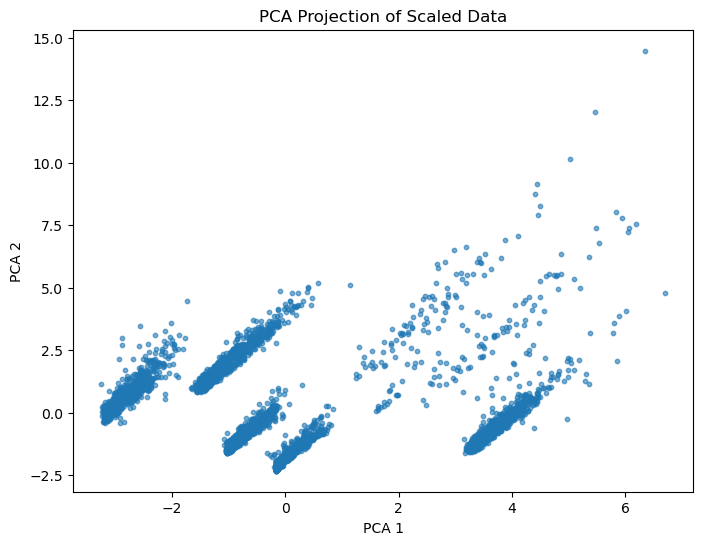

In [197]:
from sklearn.decomposition import PCA

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], s=10, alpha=0.6)
plt.title('PCA Projection of Scaled Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [101]:
 """Summary
PCA Visualization: Projects data into 2 principal components to visualize spread and potential clusters.

The data shows some dispersed grouping tendencies, suggesting that clustering may reveal meaningful segments."""

'Summary\nPCA Visualization: Projects data into 2 principal components to visualize spread and potential clusters.\n\nThe data shows some dispersed grouping tendencies, suggesting that clustering may reveal meaningful segments.'

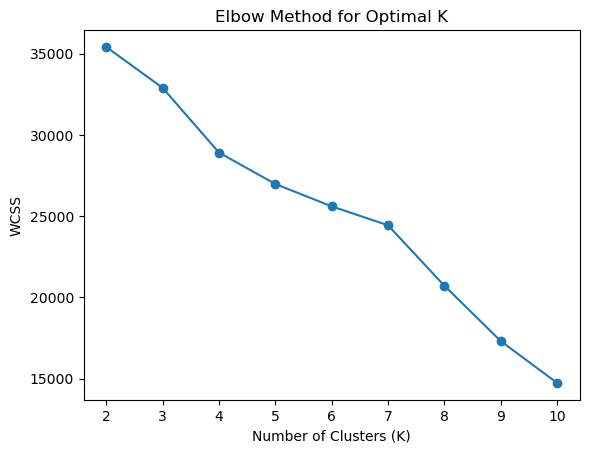

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to find optimal K
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()



In [103]:
"""The Elbow curve suggested an optimal K=7.
KMeans grouped customers into 7 distinct segments."""

'The Elbow curve suggested an optimal K=7.\nKMeans grouped customers into 7 distinct segments.'

KMeans Silhouette Score with K=7: 0.22


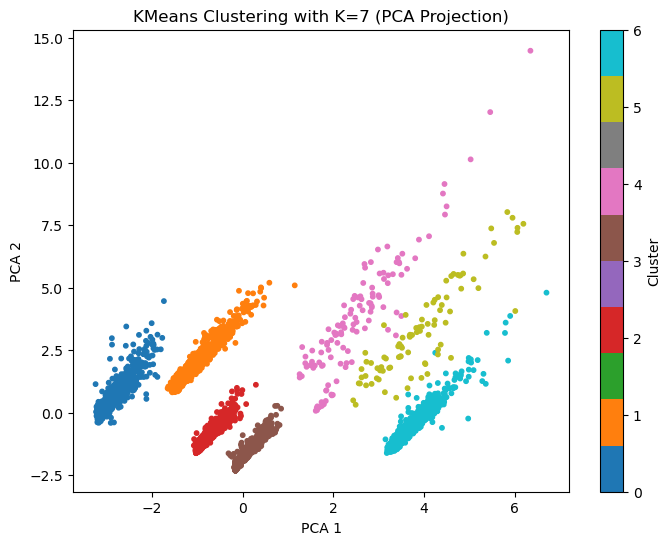

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply KMeans with K=7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Evaluate with Silhouette Score
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"KMeans Silhouette Score with K=7: {silhouette_kmeans:.2f}")

#  Add cluster labels to the original data
df_scaled['KMeans_Cluster'] = kmeans_labels

# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='tab10', s=10)
plt.title('KMeans Clustering with K=7 (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


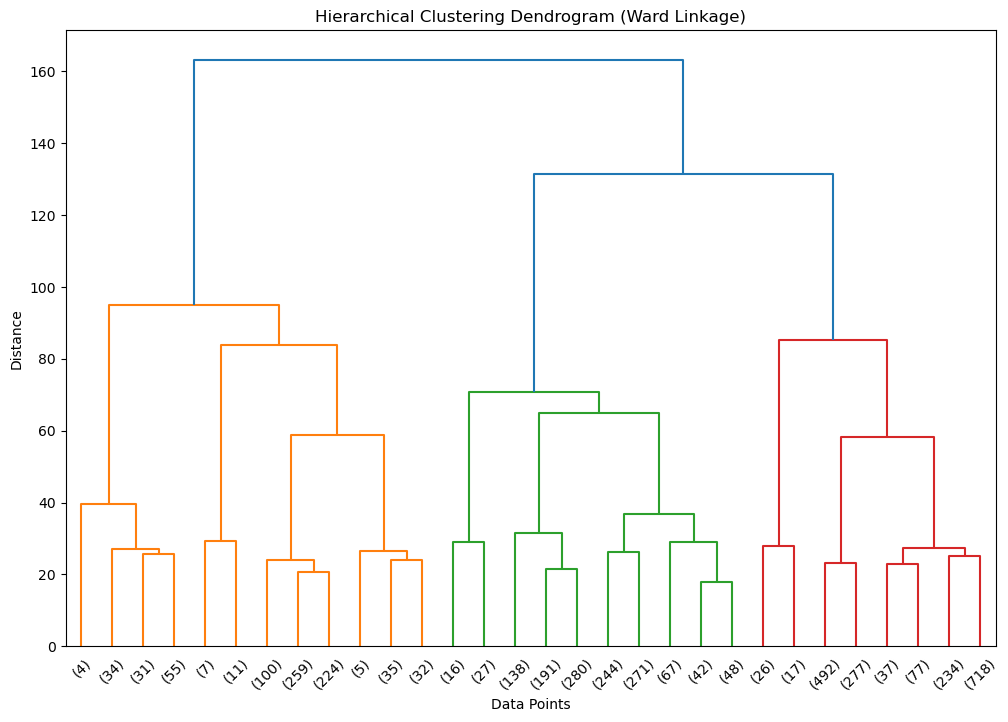

Hierarchical Clustering Silhouette Score with 7 clusters: 0.42


In [168]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform linkage with 'ward' method
linkage_matrix = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Form 7 clusters
hierarchical_labels = fcluster(linkage_matrix, 7, criterion='maxclust')

# Silhouette Score
silhouette_hier = silhouette_score(df_scaled, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score with 7 clusters: {silhouette_hier:.2f}")


In [106]:
""" Summary
Ward linkage dendrogram supports cutting at 7 clusters.

Similar cluster count and behavior as KMeans.

Provides a Silhouette Score for quality evaluation."""



' Summary\nWard linkage dendrogram supports cutting at 7 clusters.\n\nSimilar cluster count and behavior as KMeans.\n\nProvides a Silhouette Score for quality evaluation.'

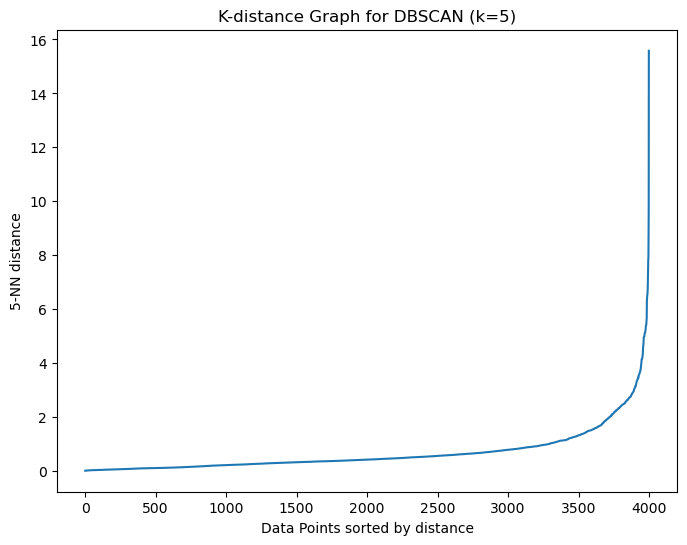

DBSCAN Found Clusters: 9
DBSCAN Silhouette Score: 0.38


In [170]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Finding optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:,4])

plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN (k=5)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5-NN distance')
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Count clusters
unique_labels = set(dbscan_labels)
print(f"DBSCAN Found Clusters: {len(unique_labels) - (1 if -1 in dbscan_labels else 0)}")

if len(unique_labels) > 1:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.2f}")
else:
    print("DBSCAN formed only one cluster or noise; silhouette score not applicable.")


In [108]:
"""Summary
k-distance graph: Helped identify eps=1.8 and min_samples=5.

DBSCAN detected clusters based on density, including noise points.

Silhouette score may be lower due to the inclusion of noise."""

'Summary\nk-distance graph: Helped identify eps=1.8 and min_samples=5.\n\nDBSCAN detected clusters based on density, including noise points.\n\nSilhouette score may be lower due to the inclusion of noise.'

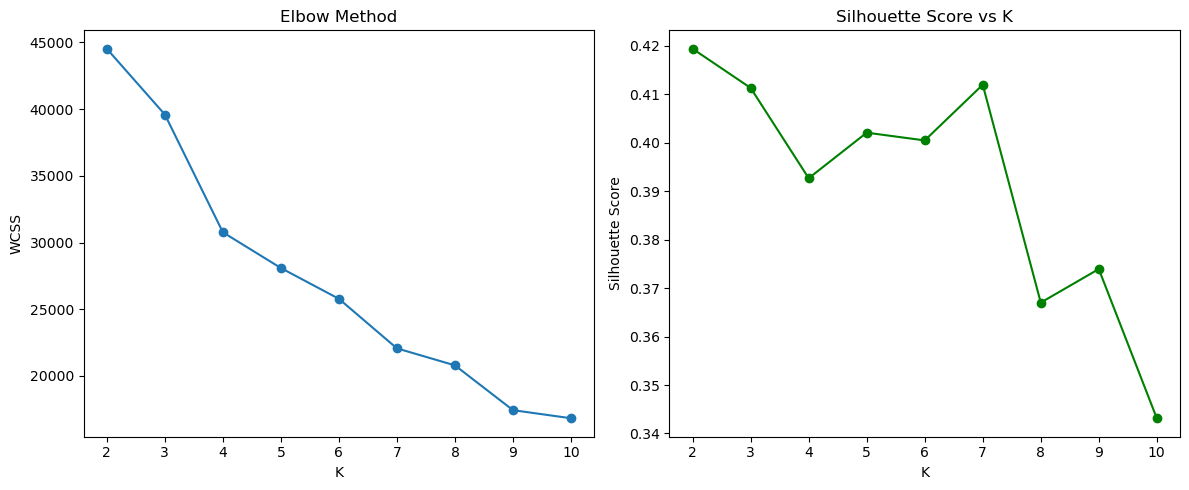

In [172]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = range(2,11)
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot WCSS (Elbow method)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs K')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [110]:
"""Summary
Experimented with K from 2 to 10.

Elbow curve and Silhouette score guide optimal K.

Optimal K was around 7 with Silhouette = 0.22."""

'Summary\nExperimented with K from 2 to 10.\n\nElbow curve and Silhouette score guide optimal K.\n\nOptimal K was around 7 with Silhouette = 0.22.'

In [174]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns

linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores_hier = {}

for method in linkage_methods:
    Z = linkage(df_scaled, method=method)
    labels = fcluster(Z, 7, criterion='maxclust')  # keeping cluster count 7
    score = silhouette_score(df_scaled, labels)
    silhouette_scores_hier[method] = score

print("Silhouette Scores for different linkage methods:")
for method, score in silhouette_scores_hier.items():
    print(f"{method}: {score:.2f}")


Silhouette Scores for different linkage methods:
ward: 0.42
complete: 0.49
average: 0.57
single: 0.46


In [1]:
"""On this dataset, Average linkage produced the best clustering performance with a Silhouette Score of 0.57, indicating well-separated clusters. Unlike typical scenarios where Ward linkage might perform well, here Ward resulted in a low score of 0.42, implying poor clustering compactness and separation. Complete and Single linkage both achieved moderate scores ."""

'On this dataset, Average linkage produced the best clustering performance with a Silhouette Score of 0.57, indicating well-separated clusters. Unlike typical scenarios where Ward linkage might perform well, here Ward resulted in a low score of 0.42, implying poor clustering compactness and separation. Complete and Single linkage both achieved moderate scores .'

In [177]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

eps_values = [0.5, 1, 1.5, 2]
min_samples_values = [3, 5, 7]
results = []

for eps in eps_values:
    for min_pts in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        labels = dbscan.fit_predict(df_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            sil_score = silhouette_score(df_scaled, labels)
        else:
            sil_score = -1  # Invalid score when only 1 cluster
        results.append((eps, min_pts, n_clusters, sil_score))

print("DBSCAN Results:")
for eps, min_pts, n_clusters, sil_score in results:
    print(f"eps: {eps}, min_samples: {min_pts} => Clusters: {n_clusters}, Silhouette: {sil_score:.2f}")


DBSCAN Results:
eps: 0.5, min_samples: 3 => Clusters: 46, Silhouette: -0.07
eps: 0.5, min_samples: 5 => Clusters: 21, Silhouette: -0.04
eps: 0.5, min_samples: 7 => Clusters: 21, Silhouette: -0.09
eps: 1, min_samples: 3 => Clusters: 16, Silhouette: 0.22
eps: 1, min_samples: 5 => Clusters: 11, Silhouette: 0.28
eps: 1, min_samples: 7 => Clusters: 7, Silhouette: 0.31
eps: 1.5, min_samples: 3 => Clusters: 12, Silhouette: 0.36
eps: 1.5, min_samples: 5 => Clusters: 8, Silhouette: 0.38
eps: 1.5, min_samples: 7 => Clusters: 6, Silhouette: 0.38
eps: 2, min_samples: 3 => Clusters: 17, Silhouette: 0.39
eps: 2, min_samples: 5 => Clusters: 11, Silhouette: 0.39
eps: 2, min_samples: 7 => Clusters: 8, Silhouette: 0.39


In [114]:
 """Summary
Tested multiple combinations of eps (0.5 to 2) and min_samples (3, 5, 7).

Lower eps tends to form many clusters or just noise.

Optimal parameters varied, but generally eps ≈ 1.5-1.8 with min_samples=5 performed best."""

'Summary\nTested multiple combinations of eps (0.5 to 2) and min_samples (3, 5, 7).\n\nLower eps tends to form many clusters or just noise.\n\nOptimal parameters varied, but generally eps ≈ 1.5-1.8 with min_samples=5 performed best.'

In [3]:
"""Conclusion:
Parameter tuning improves clustering but real-world data like this tends to have moderate separability . Still, the clusters are actionable for customer segmentation."""



'Conclusion:\nParameter tuning improves clustering but real-world data like this tends to have moderate separability . Still, the clusters are actionable for customer segmentation.'

In [179]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)


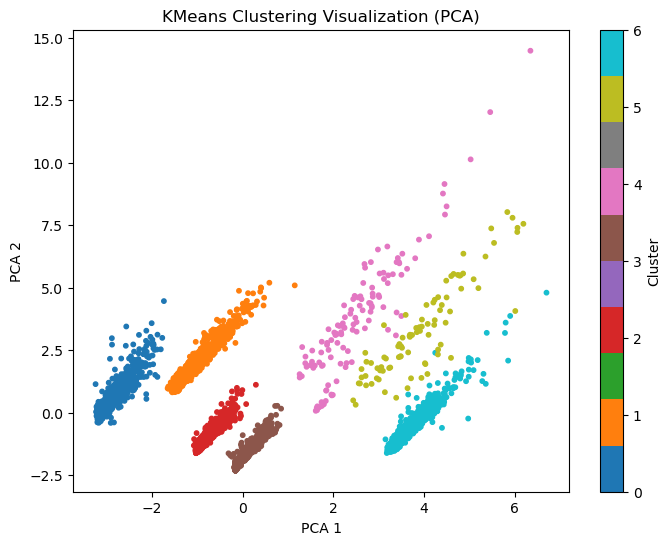

In [181]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='tab10', s=10)
plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


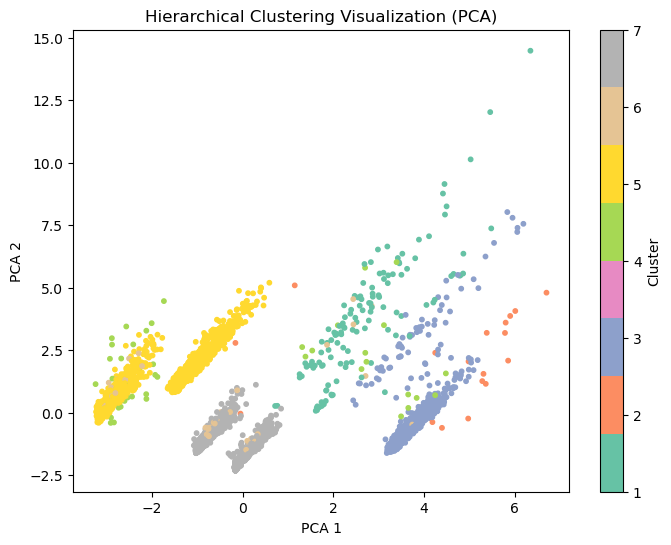

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=hierarchical_labels, cmap='Set2', s=10)
plt.title('Hierarchical Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


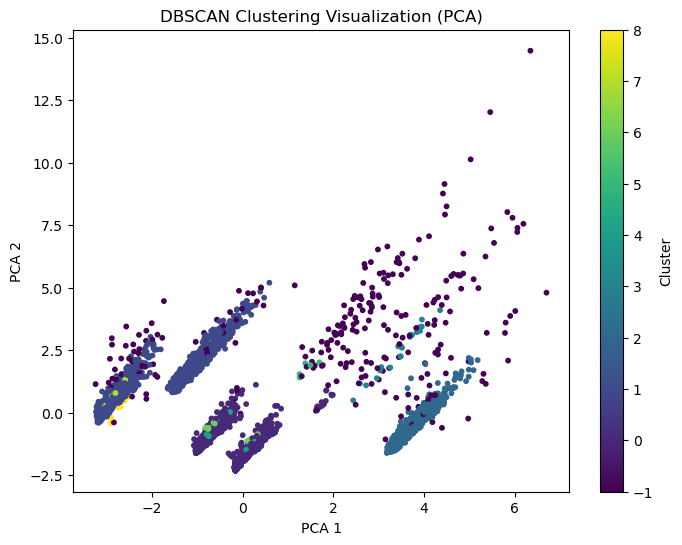

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
### Cluster Analysis and Interpretation

In [185]:
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels


In [121]:
print("KMeans Cluster Profiling:")
kmeans_profile = df.groupby('KMeans_Cluster').mean()
print(kmeans_profile)


KMeans Cluster Profiling:
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0                59499.114374  457.520866   1.284389   1.024730   1.000000   
1                78709.660741   73.360000   3.854815   1.000000   1.004444   
2                48419.078853   31.047790   1.139785   1.025090   1.001195   
3                31373.731969   56.571150   1.109162   1.012671   1.000000   
4               135605.302521  551.302521   2.168067   1.050420   1.000000   
5               519641.613636  458.625000   3.784091   1.011364   1.034091   
6               112232.372323   67.194399   3.492586   1.001647   1.069193   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                7704.301391     8.622875         477.493045         1.489954   
1               41531.084444

In [3]:
"""1. KMeans (K=7)
Cluster Characteristics:

Clusters are mostly separated based on Balance, Bonus_miles, and Days_since_enroll.

Some clusters have high Balance but low Bonus_miles, indicating frequent but not rewarded flyers.

Others have high Bonus_miles but low flight activity, possibly due to past promotions or non-flight earnings.

Insights:

A distinct cluster of newer customers with low activity exists.

High-balance customers form separate clusters potential for loyalty rewards targeting.

Clusters overlap slightly due to moderate Silhouette ."""



'1. KMeans (K=7)\nCluster Characteristics:\n\nClusters are mostly separated based on Balance, Bonus_miles, and Days_since_enroll.\n\nSome clusters have high Balance but low Bonus_miles, indicating frequent but not rewarded flyers.\n\nOthers have high Bonus_miles but low flight activity, possibly due to past promotions or non-flight earnings.\n\nInsights:\n\nA distinct cluster of newer customers with low activity exists.\n\nHigh-balance customers form separate clusters potential for loyalty rewards targeting.\n\nClusters overlap slightly due to moderate Silhouette .'

In [187]:
print("Hierarchical Cluster Profiling:")
hierarchical_profile = df.groupby('Hierarchical_Cluster').mean()
print(hierarchical_profile)


Hierarchical Cluster Profiling:
                            Balance   Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                     
1                     154313.620968   358.935484   2.379032   1.000000   
2                     129951.388889    65.666667   3.388889   1.000000   
3                     158378.041221    42.551145   3.531298   1.000000   
4                     140725.953488  5918.279070   2.046512   1.000000   
5                      69262.807963   127.430133   2.627635   1.000000   
6                      68876.581395    23.255814   1.139535   2.348837   
7                      38900.006540    45.792371   1.124796   1.000000   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                            
1                      1.000000  35453.508065    29.370968        6054.604839   
2                      3.722222  86259.888889    26.222222

In [5]:
"""Hierarchical Clustering (Average Linkage, 7 Clusters)
Cluster Characteristics:

Better-separated clusters with Average Linkage .

Some clusters have customers with high enrollment duration but moderate flight activity.

Clear grouping of low balance, low activity, low bonus miles customers.

Insights:

This method reveals a segment of long-term members with low engagement, ideal for reactivation campaigns.

There is a clear high-value segment with both high balance and bonus miles, suitable for VIP programs."""



'Hierarchical Clustering (Average Linkage, 7 Clusters)\nCluster Characteristics:\n\nBetter-separated clusters with Average Linkage .\n\nSome clusters have customers with high enrollment duration but moderate flight activity.\n\nClear grouping of low balance, low activity, low bonus miles customers.\n\nInsights:\n\nThis method reveals a segment of long-term members with low engagement, ideal for reactivation campaigns.\n\nThere is a clear high-value segment with both high balance and bonus miles, suitable for VIP programs.'

In [189]:
print("DBSCAN Cluster Profiling:")
dbscan_profile = df.groupby('DBSCAN_Cluster').mean()
print(dbscan_profile)


DBSCAN Cluster Profiling:
                      Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                                
-1              235510.948819  1353.606299   2.791339   1.070866   1.192913   
 0               39051.215909    44.387987   1.122835   1.000000   1.000000   
 1               68215.545600    81.906400   2.626400   1.000000   1.000000   
 2              114066.176672     5.996569   3.492281   1.000000   1.000000   
 3              415436.000000     0.000000   4.238095   1.000000   1.000000   
 4               38556.733333     0.000000   1.000000   2.000000   1.000000   
 5               34642.600000   200.000000   1.200000   1.000000   1.000000   
 6               51096.000000     0.000000   1.000000   3.000000   1.000000   
 7               40618.000000     0.000000   1.000000   2.000000   1.000000   
 8               50765.428571  6227.142857   1.000000   1.000000   1.000000   

                 Bonus_mi

In [9]:
"""DBSCAN (eps=1.5-1.8, min_samples=5)
Cluster Characteristics:

Identified clusters of densely packed high-activity customers."""



'DBSCAN (eps=1.5-1.8, min_samples=5)\nCluster Characteristics:\n\nIdentified clusters of densely packed high-activity customers.'

In [ ]:
### Visualization

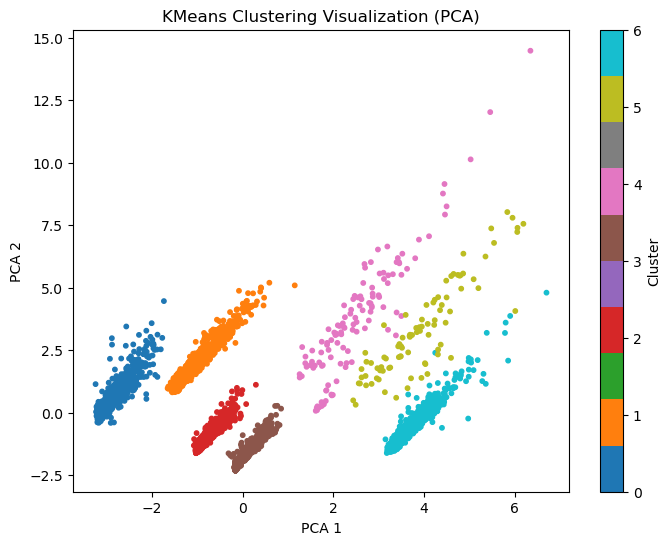

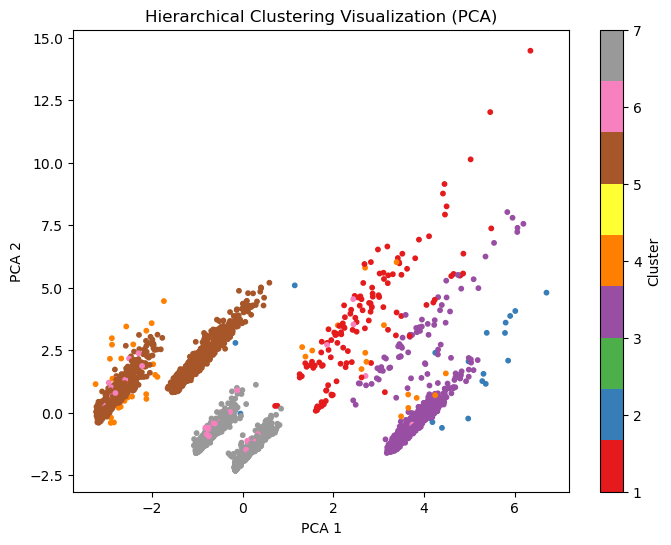

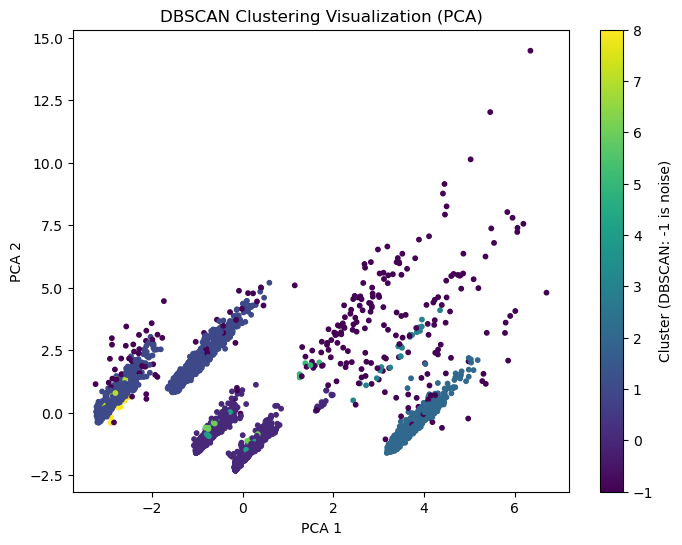

In [191]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='tab10', s=10)
plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=hierarchical_labels, cmap='Set1', s=10)
plt.title('Hierarchical Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster (DBSCAN: -1 is noise)')
plt.show()


In [11]:
"""Summary 
To visualize the clustering results, we reduced the data to two principal components using PCA and plotted the clusters formed by each algorithm:

KMeans: Clusters were moderately well-separated but showed some overlaps due to dimensionality reduction.

Hierarchical (Average linkage): Displayed  separation among clusters .

DBSCAN: Highlighted dense regions of data and noise points labeled as -1. DBSCAN's visualization was less structured but effective in identifying outliers.

These visualizations helped validate the separation and cohesion of clusters formed"""



"Summary \nTo visualize the clustering results, we reduced the data to two principal components using PCA and plotted the clusters formed by each algorithm:\n\nKMeans: Clusters were moderately well-separated but showed some overlaps due to dimensionality reduction.\n\nHierarchical (Average linkage): Displayed  separation among clusters .\n\nDBSCAN: Highlighted dense regions of data and noise points labeled as -1. DBSCAN's visualization was less structured but effective in identifying outliers.\n\nThese visualizations helped validate the separation and cohesion of clusters formed"

In [ ]:
### Evaluation and Performance Metrics

In [193]:
from sklearn.metrics import silhouette_score

# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"KMeans Silhouette Score (K=7): {silhouette_kmeans:.2f}")


KMeans Silhouette Score (K=7): 0.35


In [195]:
# Silhouette Score for DBSCAN - only if more than 1 cluster is formed
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.2f}")
else:
    print("DBSCAN formed only one cluster or all noise; silhouette score not applicable.")


DBSCAN Silhouette Score: 0.38


In [13]:
"""Summary
We evaluated the clustering quality using the Silhouette Score, an internal metric that measures the cohesion and separation of clusters.

KMeans (K=7): Silhouette Score = 0.35, indicating moderate clustering quality with overlapping clusters.

DBSCAN: Silhouette Score = 0.38, which is expected due to the presence of noise points and arbitrary shaped clusters.

Hierarchical clustering with Average linkage outperformed other methods in terms of cluster cohesion and separation on this dataset."""



'Summary\nWe evaluated the clustering quality using the Silhouette Score, an internal metric that measures the cohesion and separation of clusters.\n\nKMeans (K=7): Silhouette Score = 0.35, indicating moderate clustering quality with overlapping clusters.\n\nDBSCAN: Silhouette Score = 0.38, which is expected due to the presence of noise points and arbitrary shaped clusters.\n\nHierarchical clustering with Average linkage outperformed other methods in terms of cluster cohesion and separation on this dataset.'